In [3]:
"""
Deep learning for text and sequences: This chapter covers,
    * Preprocessing text data into useful representations.
    * Working with recurrent neural networks.
    * Using 1D convnets for sequence processing
    
    Like all other neural networks, deep-learning models dont take as input raw text:
    They only work with words, and transform each word into a vector.
    Vectorizing test is the process of tranforming text into numeric tensors. Do this by:
        * Segment text into words, and transform each word into a vector.
        * Segment text intop characters, and transform each character into a vector.
        * Extract n-grams of words or charactrers, and tranform each n-grams into a vector.
            N-grams are overlapping graoups of multiple consecutive words or chrs.
"""

# One-hot encoding of words and charcters

import numpy as np 

samples = ['The cat sat on the may.', 'The dog ate my homework.']


token_index = {}

for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1
max_legth = 10

results = np.zeros(shape=(len(samples),
                          max_legth,
                          max(token_index.values()) + 1 ))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_legth]:
        index = token_index.get(word)
        results[i, j, index] = 1



In [5]:
# Character-level one-hot encoding (toy example)

import string 

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

characters = string.printable
token_index = dict(zip(range(1, len(characters) + 1), characters))

max_legth = 50 

results = np.zeros((len(samples), max_legth, max(token_index.keys()) + 1))
for i, sample in enumerate(samples):
    for j, characters in enumerate(sample):
        index = token_index.get(characters)
        results[i, j, index] =1

In [7]:
# Using Keras for word-level one-hot ecoding

from tensorflow.keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples)

one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

word_index = tokenizer.word_index

print('Found %s unique tokens.' % len(word_index))



Found 9 unique tokens.


In [9]:
# word-level one-hot encoding with hashing trick (toy example)

samples = ['The cat set on the mat.', 'The dog ate my homework.']

dismensionatily = 1000
max_lenght = 10 

results = np.zeros((len(samples), max_legth, dismensionatily))

for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_lenght]:
        index = abs(hash(word)) % dismensionatily
        results[i,j, index] = 1


In [16]:
"""
Using word embebeddings :

Another popular and powerful way to associate a vector witha a word in the
use of dense word  vectors, also called word embeddings.
Whereas the vector obtained through one hot-hot encoding are binary, sparse (mstly made if zeros),
and very high dimensional (same simensionality as the number of words in the vocab), word emeddings
are low dimensional flosting-point vectors (that is, dense vectors, as opposed to sparse vectors)

Two ways to obtain word embeddings:

    * LEarn word embeddings jointly with the main task you care about
        (such as documetn classification or sentiment preidction).  In this setup, you can srtart with 
            random word vectors and then learn word vectors in the same way you learn the weights of
            a neural network.
            
    * Load into your model word embeddings that were precomputed using a different machine-learning task
        than the one you're trying to solve. These are called pretrained word embeddings.
"""

# Instantiation an Embedding layer

from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(1000, 64)

# The Embedding layer is best understood as s dictionary that maps integer indeiced 
 #   (which stand for specefic words) to dense vectors. It takes integers as input.
   #     it looks up these intergers in an internal dictionary, and it returns the associated vectors.


# Word index ----> Embedding layer ----> Conrresponding word vector


# Loading the IMDB data for use with an Embedding layer

from tensorflow.keras.datasets import imdb 


from tensorflow.keras import preprocessing



max_features = 10000

maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)

x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)



C:\Users\JBarr\anaconda3\envs\dev\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\JBarr\anaconda3\envs\dev\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:130: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [17]:
# Using an Embedding layer and classifer on the IMDB data

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Flatten, Dense

embed_model = Sequential()

embed_model.add(Embedding(10000, 8, input_length=maxlen))

embed_model.add(Flatten())

embed_model.add(Dense(1, activation='sigmoid'))

embed_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

embed_model.summary()

history = embed_model.fit(x_train, y_train,
                         epochs=10, batch_size=32,
                         validation_split=0.2)



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_3 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 1s 32us/sample - loss: 0.6697 - acc: 0.6249 - val_loss: 0.6216 - val_acc: 0.6976
Epoch 2/10
20000/20000 [==============================] - 1s 28us/sample - loss: 0.5440 - acc: 0.7519 - val_loss: 0.5275 - val_acc: 0.7312
Epoch 3/10
20000/20000 [=============================

In [20]:
history.params

{'batch_size': 32,
 'epochs': 10,
 'steps': None,
 'samples': 20000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc']}

In [24]:
# Processing the labels of the raw IMDB data 

import os

imdb_dir = 'Users/JBarr/OneDrive/Documents/FinTech/machineleanrning-/machineleanrning-/deepLearningPy/archive(4)'

train_dir = os.path.join(imdb_dir, 'train')

labels = [] 

texts = []

for label_type in ['neg','pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_tyype == 'neg':
                labels.append(0)
            else:
                labels.append(1)
                

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Users/JBarr/OneDrive/Documents/FinTech/machineleanrning-/machineleanrning-/deepLearningPy/archive(4)\\train\\neg'

In [26]:
# Tokenizing the text of the raw IMDB data 


from tensorflow.keras.preprocessing import Tokenzier

from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 100

training_samples = 200

validation_samples = 10000

max_words = 10000

tokenizer = Tokenizer(num_words=max_words)

tokenizer.fit_on_texts(texts)

sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index

print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels =  np.asarray(labels)

print('Shape of data tensor:', data.shape)

print({'Shape of label tensor:', labels.shape})

indices = np.arange(data.shape[0])

np.random.shuffle(indices)

data = data[indices]

labels = labels[indices]

x_train = data[:training_samples]

y_train = labels[:training_samples]

x_val = data[training_samples: training_samples + validation_samples]

y_val = labels[training_samples: training_samples + validation_samples] 

ImportError: cannot import name 'Tokenzier' from 'tensorflow.keras.preprocessing' (C:\Users\JBarr\anaconda3\envs\dev\lib\site-packages\tensorflow_core\python\keras\api\_v1\keras\preprocessing\__init__.py)

In [ ]:
"""

Downloading The Glove word embedding 
https://npl.standford.edu/projects/glove, and downlaod the precomputed embeddings from 2014 wiki.

# Preprocessing The Embeddings

# Parsing the glove word-embeddings file 

glove_dir = ''


embeddings_index = ()
f = open(os.path.join(glove_dir, 'glove.6B.1000d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray[valyes[1:]], dtype='flaot32')
    embeddings_index[word] = coefs
f.close()

print('Found %s wprd vectors.' % len(embeddings_index))

"""

In [ ]:
# Prepering the GloVe word-embeddings matrix

embedding_dim = 100

embedding_matric = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddins_index.get(word)
        if embedding_vector ois not None:
            embedding_matrix[i] = embedding_vector
            
# Using same model architecture as before

In [ ]:
# Model definition 

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Embedding, Flatten, Dense

text_model = Sequential()


text_model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
text_model.add(Flatten())

text_model.add(Dense(32, activation='relu'))

text_model.add(Dense(1, activation='sigmoid'))

text_model.summary()

# Loading pretrained word embeddings into the embedding layer 

text_model.layers[0].set_weights([embedding_matrix])

text_model.layers[0].trainable = False

In [28]:
# Training and evaluating the model

text_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])
history = text_model.fir(x_train, y_train,
                        epochs=10,
                        batch_size=32,
                        validation_data=(x_val, y_val))
text_model.sample_weights('pre_trained_glove_model.h5')

NameError: name 'max_words' is not defined

In [ ]:
import matplotlib.pyplot as plt 

acc = history.history['vacc']

val_acc = history.history['val_acc']

loss = history.history['loss']

val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training loss')

plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')

plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation loss')

plt.legend()

plt.show()



In [31]:
# Training the same model without pretrained word embeddings

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Embedding, Flatten, Dense

tenmodel = Sequential()

tenmodel.add(Embedding(max_words, embed_dim, input_length=maxlen))

tenmodel.add(Flatten())

tenmodel.add(Dense(32, activation='relu'))

tenmodel.add(Dense(1, activation='sigmoid'))

tenmodel.summary()

tenmodel.compile(optimizer='remsprop',
                loss='bianry_crossentropy',
                metrics=['acc'])

history = tenmodel.fit(x_train, y_train,
                      epochs=10, batch_size =32,
                      validation_data=(x_val, y_val))


NameError: name 'max_words' is not defined

In [2]:
# Tokenizing the data of  the test set 

test_dir = os.path.join(imdb_dir, 'test')

labels = []

texts = []

for label_type in ['neg', 'pos']:
    dir_nam,e = os.path.join(test_dir, label_type)
    for fna,e in sorted(os.listfir(dir_name)):
        if fname[-4:] == '.txt':
                if fname[-4:] == '.txt':
                    f = open(os.path.join(dir_name, fname))
                    texts.append(f.read())
                    f.close()
                    if label_type == 'neg':
                        labels.append(0)
                    else:
                        labels.append(1)
                        
sequences = tokenizer.texts_to_sequences(texts)

x_test = pad_sequences(sequences, maxlen = maxlen)

y_test = np.asarray(labels)


# Next, load and evaluate the firat model- Evaluating the model on the test set 

model.load_weights('pre_trained_glove_model.h5')

model.evaluate(x_test, y_test)

NameError: name 'os' is not defined

In [ ]:
"""
To make these notions of loop and state clear,
lets implement the forward pass of a toy rnn in Nunpy.
This RNN takes as input a sequence of vectors, whcih you;; encode as a 2d tesnor of size 
(timesteps, input_features). It loops over timesteps, the previos output isn't defined;
hencem there is no current state. so you'll initialize the state as an allzoer vector called 
the initial state of the network.

state_t = 0 

for input_t in input_sequence:
    output_t = f(input_t, state_t)
    state_t = output_t 
    
# More detailed pseudocode for the RNN

state_t = 0

for input_t in input_sequence:
    output_t = activation(dot(W, input_t) + dot(U, state_t) + b)
    state_t = output_t    
"""


In [5]:
# Numpy implementaion of a simple RNN 

import numpy as np 

timesteps = 100

input_features = 32 

output_features = 64 

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successice_outputs = []

for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    
    successice_outputs.append(output_t)
    
    state_t = output_t
    
final_output_sequece = np.concatenate(successice_outputs, axis=0)


# In summary an RNN ia a for loop that reuses quantittie
# Computed during the previous iteration fo the loop
# RNNS are characterized bu theit step function, such as the following function is this case

output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)

In [13]:
# A recurrent layer in Keras 

from tensorflow.keras.layers import SimpleRNN

from tensorflow.keras.models import Sequential 

from tensorflow.keras.layers import Embedding, SimpleRNN

In [14]:
reccurent_model = Sequential()

reccurent_model.add(Embedding(100000, 32))

reccurent_model.add(SimpleRNN(32))

reccurent_model.summary()



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          3200000   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 3,202,080
Trainable params: 3,202,080
Non-trainable params: 0
_________________________________________________________________


In [20]:
"""
Now use such model on the IMDB movie-review-classification problem.
"""

from tensorflow.keras.datasets import imdb

from tensorflow.keras.preprocessing import sequence

max_features = 10000
maxlen = 5000
batch_size = 32 
#x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x times)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x times)
input_train shape: (25000, 5000)
input_test shape: (25000, 5000)


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 112s 6ms/sample - loss: 0.6134 - acc: 0.6457 - val_loss: 0.4546 - val_acc: 0.7976
Epoch 2/10
20000/20000 [==============================] - 117s 6ms/sample - loss: 0.3894 - acc: 0.8395 - val_loss: 0.5260 - val_acc: 0.7502
Epoch 3/10
20000/20000 [==============================] - 117s 6ms/sample - loss: 0.3008 - acc: 0.8767 - val_loss: 0.3827 - val_acc: 0.8418
Epoch 4/10
20000/20000 [==============================] - 119s 6ms/sample - loss: 0.2454 - acc: 0.9033 - val_loss: 0.3946 - val_acc: 0.8392
Epoch 5/10
20000/20000 [==============================] - 118s 6ms/sample - loss: 0.2794 - acc: 0.8768 - val_loss: 0.5805 - val_acc: 0.7152
Epoch 6/10
20000/20000 [==============================] - 119s 6ms/sample - loss: 0.4303 - acc: 0.7922 - val_loss: 0.4090 - val_acc: 0.8282
Epoch 7/10
20000/20000 [==============================] - 119s 6ms/sample - loss: 0.2017 - acc: 0.9214 - val_lo

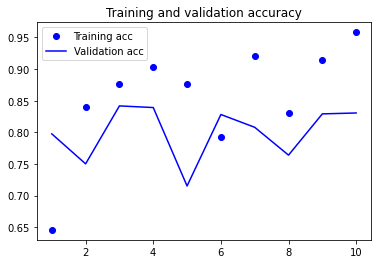

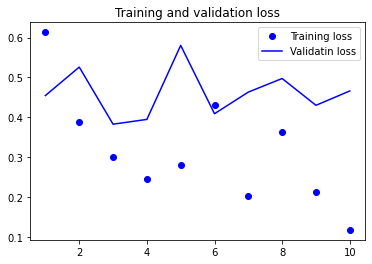

In [23]:
# LEt's train a simple recurrent network using an Embedding layer an a SimpleRNN layer

from tensorflow.keras.layers import Dense 

emdedModel = Sequential()

emdedModel.add(Embedding(max_features, 32))

emdedModel.add(SimpleRNN(32))

emdedModel.add(Dense(1, activation='sigmoid'))

emdedModel.compile(loss='binary_crossentropy', metrics=['acc'])
history = emdedModel.fit(input_train, y_train,
                         epochs=10, batch_size=128,
                         validation_split=0.2)

# Now,lets display the traing and validation loss and accuracy 

import matplotlib.pyplot as plt 

acc = history.history['acc']

val_acc = history.history['val_acc']

loss = history.history['loss']

val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validatin loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



In [ ]:
## LSTM and GRU layers

# Pseudocode details of the LSTM Architecture 

output_t = activation(dot(state_t, Uo) + dot(input_t, Wo) + dot(C_t, Vo) + bo)

i_t = activation(dot(state_t, Ui) + dot(input_t), Wi) + bi)

f_t = activation(dot(state_t, Uf) + dot(input_t, Wf) + bf)

k_t = activation(dot(state_t, Uk) + dot(input_t, Wk) + bk)

# 
c_t+ 1 = i_t * k_t + c_t * f_t

In [ ]:
# A concrete LSTM example in Keras 

from tensorflow.keras.layers import LSTM

lsmodel = Sequential()

lsmodel.add(Embedding(max_features, 32))

lsmodel.add(LSTM(32))

lsmodel.add(Dense(1, activation='sigmoid'))


lsmodel.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])
history = lsmodel.fit(input_train, y_train,
                      epochs = 10, batch_size=128,
                      validation_split=0.2)
            


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
  640/20000 [..............................] - ETA: 13:36 - loss: 0.6918 - acc: 0.5437